In [38]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [39]:
# Read data
stock_df = pd.read_csv("./individual_book_train/stock_1.csv")

stock_df.info()
stock_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507532 entries, 0 to 1507531
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   time_id            1507532 non-null  int64  
 1   seconds_in_bucket  1507532 non-null  int64  
 2   bid_price1         1507532 non-null  float64
 3   ask_price1         1507532 non-null  float64
 4   bid_price2         1507532 non-null  float64
 5   ask_price2         1507532 non-null  float64
 6   bid_size1          1507532 non-null  int64  
 7   ask_size1          1507532 non-null  int64  
 8   bid_size2          1507532 non-null  int64  
 9   ask_size2          1507532 non-null  int64  
 10  stock_id           1507532 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 126.5 MB


,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.000754,1.001542,1.000689,1.001607,1,25,25,100,1
1,5,1,1.000754,1.001673,1.000689,1.001739,26,60,25,100,1
2,5,2,1.000754,1.001411,1.000623,1.001476,1,25,25,125,1
3,5,3,1.000754,1.001542,1.000689,1.001607,125,25,126,36,1
4,5,4,1.000754,1.001476,1.000623,1.001542,100,100,25,25,1


In [40]:
# Data cleaning
df_grouped = stock_df.groupby('time_id')

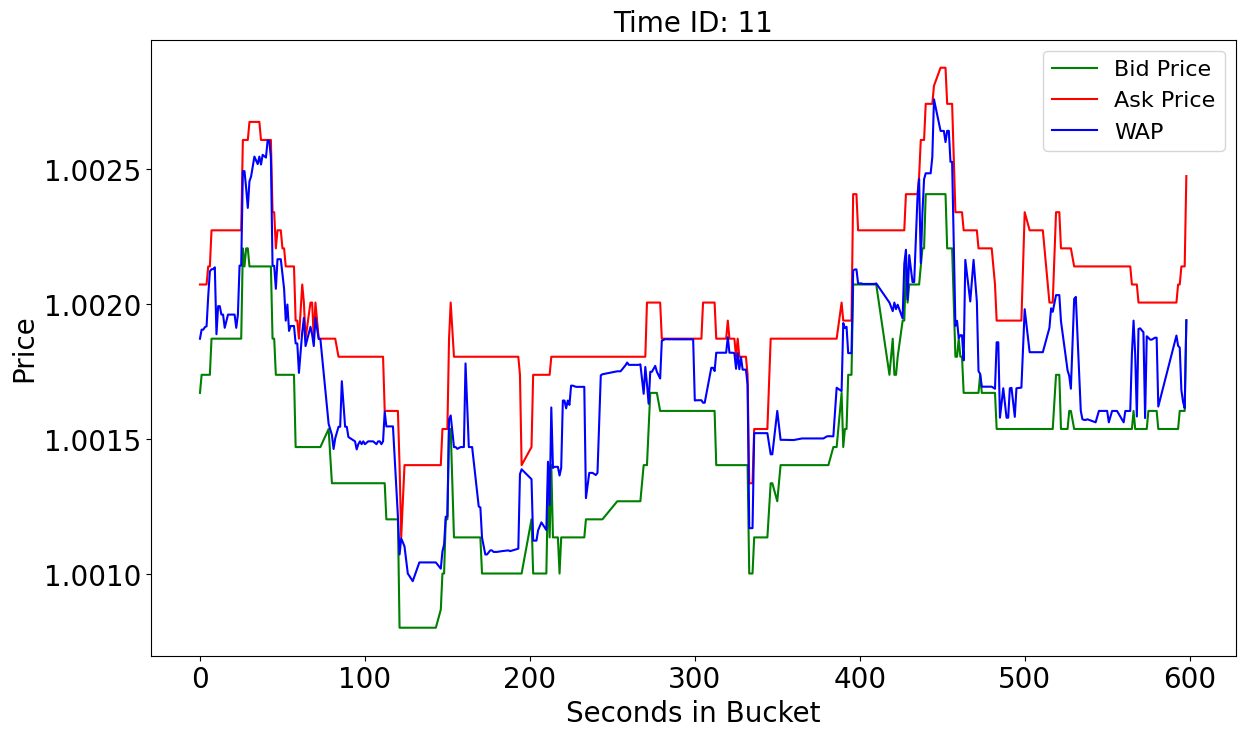

In [41]:
# Calculate WAP
def calculate_wap(df: pd.DataFrame) -> pd.DataFrame:
    df_copy = df.copy()
    df_copy['WAP'] = (df_copy['bid_price1']*df_copy['ask_size1'] + df_copy['ask_price1']*df_copy['bid_size1']) /\
    (df_copy['bid_size1'] + df_copy['ask_size1'])

    return df_copy


# Visualization on bid-ask price
def visualize_price_in_time_id(time_id: int):
    df = calculate_wap(df_grouped.get_group(time_id))

    plt.figure(figsize=(14,8))
    sns.lineplot(data=df, x='seconds_in_bucket', y='bid_price1', color='green', label='Bid Price')
    sns.lineplot(data=df, x='seconds_in_bucket', y='ask_price1', color='red', label='Ask Price')
    sns.lineplot(data=df, x='seconds_in_bucket', y='WAP', color='blue', label='WAP')

    plt.title(f"Time ID: {time_id}", fontsize=20)
    plt.xlabel('Seconds in Bucket', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.legend(loc='upper right', fontsize=16)
    
    plt.show()

# Applied Function
visualize_price_in_time_id(11)

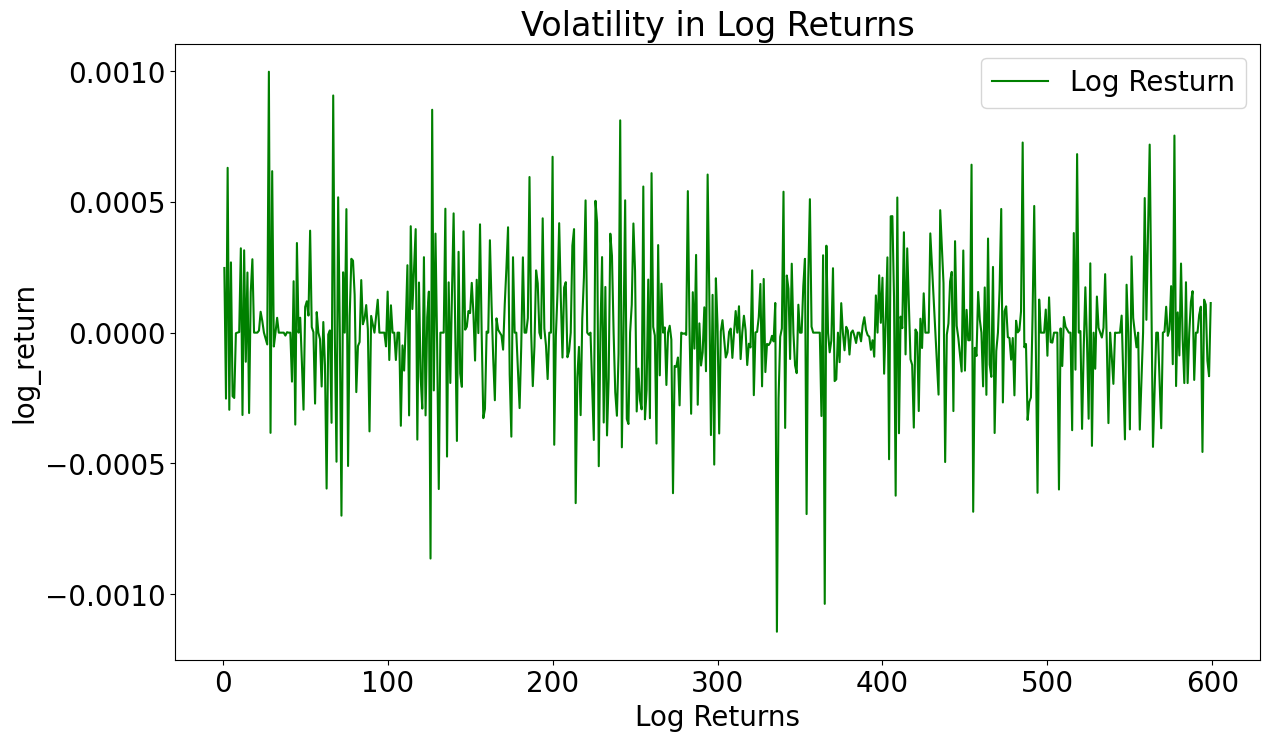

In [42]:
def calculate_volatility(df: pd.DataFrame) -> pd.DataFrame:
    df_copy = df.copy()
    if 'WAP' not in df_copy.columns:
        df_copy = calculate_wap(df_copy)
    
    df_copy['log_return'] = np.log(df_copy['WAP'] / df_copy['WAP'].shift(1))
    
    return df_copy

def visualize_log_returns_in_time_id(time_id: int):
    df = calculate_volatility(df_grouped.get_group(time_id))

    plt.figure(figsize=(14,8))
    sns.lineplot(data=df, x='seconds_in_bucket', y='log_return', color='green', label='Log Resturn')

    plt.ylabel('Log Returns')
    plt.xlabel('Seconds in Bucket')
    plt.title('Volatility in Log Returns')

    plt.show

# Applied Function
visualize_log_returns_in_time_id(5)